In [70]:
import gzip
import numpy as np
import struct
import matplotlib.pyplot as plt

In [109]:
with gzip.GzipFile('DAQ_2025-06-05T17-33-31/DATA_0/EOS.gz', 'rb') as f:
    buf = f.read(1_000_000_000)

In [111]:
it = struct.iter_unpack(">lQ2s", buf)

In [112]:
ev = list(it)

In [113]:
np.frombuffer(ev[0][-1], dtype=np.float16), np.frombuffer(b'\x00D', dtype=np.float16)

(array([nan], dtype=float16), array([4.], dtype=float16))

In [114]:
ev

[(0, 1749108818734747681, b'\x00~'),
 (0, 1749108818735504811, b'\xcd<'),
 (0, 1749108818740159979, b'\x95<'),
 (0, 1749108818744362999, b';<'),
 (0, 1749108818748521889, b'\x90;'),
 (0, 1749108818752793539, b'`:'),
 (0, 1749108818756950114, b'09'),
 (0, 1749108818761089134, b'\xd87'),
 (0, 1749108818765268803, b'k5'),
 (0, 1749108818769624749, b'\x9b2'),
 (0, 1749108818773782935, b'f.'),
 (1, 1749108818776425473, b'\x00~'),
 (1, 1749108818776623899, b'2*'),
 (1, 1749108818780787067, b'\x9b\x1e'),
 (1, 1749108818784993050, b'\x9b\x1a'),
 (1, 1749108818789156515, b'\xf4('),
 (1, 1749108818793296220, b'o/'),
 (1, 1749108818797432518, b'\x1f3'),
 (1, 1749108818801626853, b'\xc85'),
 (1, 1749108818805772743, b'\x008'),
 (1, 1749108818809915115, b'Q9'),
 (1, 1749108818814063913, b'z:'),
 (2, 1749108818818468025, b'\x00~'),
 (2, 1749108818818569544, b'\xb7;'),
 (2, 1749108818822719842, b'O<'),
 (2, 1749108818826848584, b'\xa2<'),
 (2, 1749108818831071548, b'\xc9<'),
 (2, 1749108818835277198,

In [115]:
frames =  [ev[i][0] for i in range(len(ev)) if ev[i][-1] == b'\x00~']
t0 = [ev[i][1] for i in range(len(ev)) if ev[i][-1] == b'\x00~']
t4 = [ev[i][1] for i in range(len(ev)) if ev[i][-1] != b'\x00~']
t4ADC = [ev[i][2] for i in range(len(ev)) if ev[i][-1] != b'\x00~']
t4ADC = np.frombuffer(b"".join(t4ADC), dtype=np.float16)

In [116]:
len(frames)

359

In [117]:
t0_s = np.array(t0) / 1e9
t4_s = np.array(t4) / 1e9

In [119]:
np.mean(1/np.diff(t0_s)), np.mean(1/np.diff(t4_s))

(np.float64(24.00185625544127), np.float64(257.650280713058))

In [120]:
# t0_s -= start
# t4_s -= start

t4_s -= t0_s[0]
t0_s -= t0_s[0]


In [121]:
(42.18/360) * (1/24) * 1000

4.881944444444444

(0.0, 1.0)

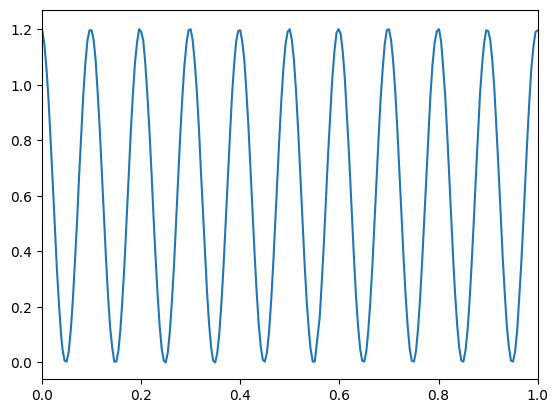

In [122]:
plt.plot(t4_s, t4ADC)
plt.xlim(0, 1)

In [123]:
(t0_s * 1000)[:10]

array([  0.        ,  41.67771339,  83.72044563, 125.3426075 ,
       167.03772545, 208.67824554, 249.89199638, 291.59021378,
       333.17661285, 375.31518936])

In [79]:
np.mean((t4_s * 1000) - (t0_s * 1000))

ValueError: operands could not be broadcast together with shapes (3690,) (383,) 

In [124]:
25.6/1024/10*3600*24*5

1080.0

In [125]:
np.min(np.diff(t0_s)), np.max(np.diff(t0_s))

(np.float64(0.03900456428527832), np.float64(0.044226884841918945))

In [126]:
from multiprocessing import Value
import ctypes

In [134]:
frames =  np.array([ev[i][0] for i in range(len(ev))])

In [138]:
for i in range(359):
    print(np.count_nonzero(frames == 0))

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
1

In [139]:
np.linspace(0., 0.04, 10, endpoint=False)

array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
       0.036])

In [142]:
np.max(np.diff(t4_s)), np.min(np.diff(t4_s))

(np.float64(0.009861946105957031), np.float64(0.00011444091796875))

In [144]:
np.max(t4ADC

array([1.2   , 1.1455, 1.058 , ..., 1.196 , 1.2   , 1.161 ],
      shape=(3410,), dtype=float16)